In [99]:
import numpy as np
import matplotlib.pyplot as plt
#from scipy.misc import imread
import matplotlib.image as mpimg

foreground = mpimg.imread('foreground.png')
background = mpimg.imread('background.png')
picture = mpimg.imread('picture.png')
#print(foreground,background)

nrows = foreground.shape[0]
ncols = foreground.shape[1]

fhist = np.zeros((256,256,256))
bhist = np.zeros((256,256,256))

fgpixels = 0
bgpixels = 0

for row in range(0,nrows):
    for col in range(0,ncols):
        #background first. pixels not in the background are in white
        r = int(background[row,col,0]*255);
        g = int(255*background[row,col,1]);
        b = int(255*background[row,col,2]);
        if (r!=255 or g!=255 or b!=255):
            bhist[r,g,b] += 1;
            bgpixels = bgpixels+1;
        #foreground now. pixels not in the foreground are in black
        r = int(foreground[row,col,0]*255);
        g = int(255*foreground[row,col,1]);
        b = int(255*foreground[row,col,2]);
        if (r!=0 or g!=0 or b!=0):
            fhist[r,g,b] += 1;
            fgpixels = fgpixels+1;
            
fhist /= fgpixels;
bhist /= bgpixels;

print(fgpixels,bgpixels,fhist[0,255,0],bhist[255,0,0])

def neighbours(i,j,M,N,size=8):
    if size==4:
        if (i==0 and j==0):
            n=[(0,1), (1,0)]
        elif i==0 and j==N-1:
            n=[(0,N-2), (1,N-1)]
        elif i==M-1 and j==0:
            n=[(M-1,1), (M-2,0)]
        elif i==M-1 and j==N-1:
            n=[(M-1,N-2), (M-2,N-1)]
        elif i==0:
            n=[(0,j-1), (0,j+1), (1,j)]
        elif i==M-1:
            n=[(M-1,j-1), (M-1,j+1), (M-2,j)]
        elif j==0:
            n=[(i-1,0), (i+1,0), (i,1)]
        elif j==N-1:
            n=[(i-1,N-1), (i+1,N-1), (i,N-2)]
        else:
            n=[(i-1,j), (i+1,j), (i,j-1), (i,j+1)]
            
        n = np.array(n)
        return n

    if size==8:
        if (i==0 and j==0):
            n=[(0,1), (1,0), (1,1)]
        elif i==0 and j==N-1:
            n=[(0,N-2), (1,N-1), (1,N-2)]
        elif i==M-1 and j==0:
            n=[(M-1,1), (M-2,0),(M-2,1)]
        elif i==M-1 and j==N-1:
            n=[(M-1,N-2), (M-2,N-1),(M-2,N-2)]
        elif i==0:
            n=[(0,j-1), (0,j+1), (1,j),(1,j-1),(1,j+1)]
        elif i==M-1:
            n=[(M-1,j-1), (M-1,j+1), (M-2,j),(M-2,j-1),(M-2,j+1)]
        elif j==0:
            n=[(i-1,0), (i+1,0), (i,1),(i-1,1),(i+1,1)]
        elif j==N-1:
            n=[(i-1,N-1), (i+1,N-1), (i,N-2),(i-1,N-2),(i+1,N-2)]
        else:
            n=[(i-1,j), (i+1,j), (i,j-1), (i,j+1),(i-1,j-1),(i-1,j+1),(i+1,j-1),(i+1,j+1)]
        n = np.array(n)
        return n

22420 60251 0.4685994647636039 0.1206784949627392


In [100]:
def varBayes(y,niterations,weight):
    rows = y.shape[0]
    cols = y.shape[1]
    x = np.zeros((rows,cols))
    #mu = np.matrix.copy(y)
    mu = np.zeros((rows,cols))
    m = np.zeros((rows,cols))
    for tau in range(0,niterations):
        for row in range(0,rows):
            for col in range(0,cols):
                m[row,col]=0
                neigbs = neighbours(row,col,rows,cols,8)
                r = int(y[row,col,0]*255);
                g = int(y[row,col,1]*255);
                b = int(y[row,col,2]*255);
                Li1 = fhist[r,g,b]
                Lim1 = bhist[r,g,b]
                #print(Li1)
                for j in range(0,neigbs.shape[0]):
                    m[row,col] += weight*mu[neigbs[j][0]][neigbs[j][1]]
                # The most reasonable is to take weights of 1/8 or less
                mu[row,col] = np.tanh(m[row,col]+1/2*(Li1-Lim1))
                if mu[row,col] > 0:
                    x[row,col] = 1
                else:
                    x[row,col] = -1
                    
    return x 

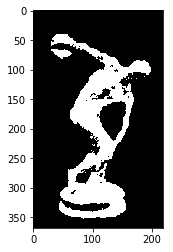

In [104]:
segmentation = varBayes(picture,3,1/8)
plt.imshow(segmentation,cmap='gray')

0.0